- **Problem Definition**

The focus of this project will be the Connectionist Bench (Sonar, Mines vs. Rocks) Data Set ) avaialble from the UCI Machine Learning Repository. The task is to train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

In [1]:
# loading the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV ,train_test_split
from sklearn.metrics import confusion_matrix ,classification_report , accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier, ExtraTreesClassifier , GradientBoostingClassifier


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing warning filters

# deprecation warnings filter
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Supressing future warnings

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### 1. EDA

In [3]:
# loading the dataset

df = pd.read_csv('sonar.all-data.csv')
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
# Shape of the dataset

df.shape

(207, 61)

In [5]:
# data types in the dataset

df.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
0.0986    float64
0.1539    float64
0.1601    float64
0.3109    float64
0.2111    float64
0.1609    float64
0.1582    float64
0.2238    float64
0.0645    float64
0.0660    float64
0.2273    float64
0.3100    float64
0.2999    float64
0.5078    float64
0.4797    float64
0.5783    float64
0.5071    float64
0.4328    float64
0.5550    float64
0.6711    float64
0.6415    float64
0.7104    float64
0.8080    float64
0.6791    float64
0.3857    float64
           ...   
0.2604    float64
0.5121    float64
0.7547    float64
0.8537    float64
0.8507    float64
0.6692    float64
0.6097    float64
0.4943    float64
0.2744    float64
0.0510    float64
0.2834    float64
0.2825    float64
0.4256    float64
0.2641    float64
0.1386    float64
0.1051    float64
0.1343    float64
0.0383    float64
0.0324    float64
0.0232    float64
0.0027    float64
0.0065    float64
0.0159    float64
0.0072    float64
0.0167    

**Observations**

- 1. All the feaures seem to be in the same scale
- 2. The class feature in a numpy object with values as string

In [11]:
# data secription and changing precision to 3

set_option('precision' , 3)
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000,2.070e+02,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000,2.070e+02,2.070e+02,207.000,2.070e+02,2.070e+02,2.070e+02,2.070e+02,2.070e+02,2.070e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.177,0.208,0.236,0.251,0.274,0.298,0.321,0.379,0.416,0.453,0.505,0.563,0.609,0.625,0.648,0.673,0.675,0.700,0.702,0.693,0.642,0.582,0.506,0.440,0.417,0.402,0.390,0.383,0.362,0.338,0.325,0.311,0.290,0.278,0.246,0.213,0.197,0.161,0.123,0.091,0.052,0.020,0.016,1.347e-02,1.073e-02,0.011,9.300e-03,8.181e-03,7.771e-03,7.947e-03,7.936e-03,6.523e-03
std,0.023,3.304e-02,0.039,0.047,0.056,0.059,0.062,0.085,0.118,0.135,0.133,0.140,0.141,0.164,0.205,0.233,0.264,0.262,0.259,0.263,0.258,0.256,0.250,0.240,0.246,0.238,0.246,0.238,0.241,0.221,0.213,0.213,0.207,0.230,0.258,0.263,0.240,0.213,0.199,0.179,0.171,0.169,0.139,0.133,0.152,0.134,0.087,0.062,0.036,0.014,0.012,9.628e-03,7.071e-03,0.007,7.103e-03,5.719e-03,5.756e-03,6.485e-03,6.196e-03,5.038e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,0.029,0.024,0.018,0.027,0.003,0.016,0.035,0.037,0.049,0.066,0.051,0.022,0.056,0.024,0.024,0.092,0.048,0.028,0.014,0.061,0.048,0.040,0.048,0.021,0.022,0.008,0.035,0.038,0.037,0.012,0.036,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.640e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,0.128,0.133,0.166,0.176,0.167,0.196,0.206,0.242,0.299,0.350,0.398,0.406,0.455,0.540,0.525,0.544,0.530,0.534,0.461,0.414,0.349,0.284,0.257,0.218,0.179,0.154,0.160,0.174,0.172,0.186,0.164,0.159,0.155,0.127,0.094,0.068,0.064,0.045,0.026,0.011,0.008,7.350e-03,5.050e-03,0.005,4.100e-03,4.400e-03,3.700e-03,3.600e-03,3.650e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.106,0.112,0.152,0.181,0.225,0.250,0.266,0.282,0.284,0.307,0.307,0.371,0.435,0.543,0.627,0.667,0.701,0.701,0.722,0.754,0.754,0.732,0.682,0.607,0.491,0.430,0.390,0.350,0.311,0.320,0.304,0.310,0.283,0.279,0.261,0.244,0.221,0.178,0.147,0.121,0.102,0.078,0.045,0.018,0.014,1.150e-02,9.600e-03,0.009,7.500e-03,6.800e-03,5.900e-03,5.800e-03,6.300e-03,5.300e-03
75%,0.036,4.810e-02,0.058,0.066,0.101,0.134,0.153,0.170,0.231,0.269,0.302,0.332,0.351,0.387,0.453,0.536,0.660,0.679,0.732,0.809,0.818,0.832,0.852,0.873,0.875,0.894,0.917,0.902,0.852,0.737,0.643,0.586,0.557,0.584,0.591,0.554,0.510,0.439,0.431,0.425,0.389,0.385,0.325,0.268,0.230,0.201,0.155,0.120,0.069,0.025,0.021,1.675e-02,1.490e-02,0.014,1.210e-02,1.035e-02,1.035e-02,1.040e-02,1.035e-02,8.550e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,0.734,0.706,0.713,0.997,1.000,0.999,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.966,0.931,1.000,0.965,1.000,1.000,0.950,1.000,0.986,0.930,0.899,0.825,0.773,0.776,0.703,0.729,0.552,0.334,0.198,0.083,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


**Observations**

- 1. All features have the same scale but their mean values differ. Standardizing the dataset is a good option

In [14]:
# class distribution

df.groupby('R').size()

R
M    111
R     96
dtype: int64

In [17]:
# checking correlation between the attributes

set_option('precision' , 3)
corr =df.corr()
corr

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0.0200,1.000,0.736,0.572,0.491,3.457e-01,0.239,0.262,0.356,0.357,0.318,0.343,2.099e-01,0.210,0.255,0.304,0.238,0.137,0.041,0.055,0.156,1.175e-01,-0.058,-1.654e-01,-2.193e-01,-0.296,-0.344,-0.342,-2.236e-01,-1.989e-01,-0.079,-0.052,-0.032,-0.031,0.034,0.102,0.085,0.123,0.213,0.210,0.100,0.125,0.214,0.207,0.162,0.281,0.319,0.230,0.205,2.470e-01,0.272,2.559e-01,0.354,3.110e-01,0.324,0.312,0.225,0.320,0.368,0.358,0.346
0.0371,0.736,1.000,0.780,0.607,4.199e-01,0.332,0.279,0.335,0.318,0.271,0.297,1.942e-01,0.250,0.274,0.309,0.262,0.152,0.043,0.041,0.102,7.523e-02,-0.074,-1.799e-01,-1.967e-01,-0.295,-0.366,-0.337,-2.344e-01,-2.285e-01,-0.116,-0.057,-0.050,-0.108,-0.004,0.117,0.134,0.170,0.219,0.187,0.098,0.189,0.261,0.186,0.134,0.286,0.304,0.256,0.266,3.140e-01,0.247,3.209e-01,0.436,3.463e-01,0.385,0.380,0.264,0.283,0.353,0.352,0.359
0.0428,0.572,0.780,1.000,0.783,5.464e-01,0.346,0.191,0.238,0.254,0.220,0.275,2.149e-01,0.259,0.293,0.287,0.237,0.201,0.121,0.099,0.103,6.398e-02,-0.027,-7.364e-02,-8.549e-02,-0.214,-0.292,-0.263,-2.568e-01,-2.907e-01,-0.198,-0.107,-0.110,-0.171,-0.100,0.017,0.054,0.108,0.131,0.111,0.074,0.190,0.233,0.114,0.073,0.181,0.174,0.180,0.235,2.231e-01,0.081,2.384e-01,0.395,3.331e-01,0.368,0.290,0.289,0.384,0.334,0.425,0.374
0.0207,0.491,0.607,0.783,1.000,7.293e-01,0.353,0.249,0.248,0.252,0.238,0.270,1.735e-01,0.215,0.284,0.276,0.247,0.222,0.193,0.190,0.187,1.420e-01,0.034,-3.281e-02,-1.049e-01,-0.207,-0.293,-0.295,-2.549e-01,-3.003e-01,-0.240,-0.198,-0.173,-0.163,-0.079,0.022,0.046,0.068,0.095,0.093,0.044,0.141,0.145,0.052,-0.003,0.090,0.080,0.045,0.124,1.322e-01,0.081,1.771e-01,0.372,3.635e-01,0.337,0.284,0.288,0.349,0.346,0.421,0.399
0.0954,0.346,0.420,0.546,0.729,1.000e+00,0.597,0.335,0.204,0.177,0.183,0.233,2.131e-01,0.300,0.363,0.322,0.330,0.327,0.301,0.341,0.286,2.054e-01,0.154,7.560e-02,2.442e-04,-0.067,-0.125,-0.170,-2.157e-01,-2.842e-01,-0.272,-0.213,-0.172,-0.202,-0.144,-0.090,-0.077,-0.067,-0.011,0.062,0.062,0.102,0.125,0.063,0.029,0.088,0.082,0.042,0.083,8.886e-02,0.065,1.150e-01,0.269,3.164e-01,0.204,0.197,0.198,0.218,0.239,0.291,0.255
0.0986,0.239,0.332,0.346,0.353,5.974e-01,1.000,0.704,0.472,0.329,0.289,0.334,3.445e-01,0.411,0.397,0.369,0.354,0.293,0.236,0.226,0.207,1.747e-01,0.124,6.378e-02,2.680e-02,-0.043,-0.100,-0.129,-1.185e-01,-1.560e-01,-0.152,-0.055,-0.052,-0.144,-0.070,-0.028,-0.023,-0.064,-0.048,0.031,0.081,0.075,0.049,0.035,0.050,0.086,0.029,0.017,0.068,8.057e-02,0.018,1.722e-01,0.253,1.623e-01,0.165,0.133,0.168,0.163,0.204,0.221,0.178
0.1539,0.262,0.279,0.191,0.249,3.348e-01,0.704,1.000,0.676,0.469,0.426,0.399,2.766e-01,0.367,0.415,0.417,0.365,0.251,0.210,0.216,0.197,1.662e-01,0.065,1.155e-02,1.324e-02,-0.057,-0.126,-0.180,-1.182e-01,-1.302e-01,-0.066,-0.093,-0.114,-0.128,-0.082,-0.020,-0.001,-0.005,0.063,0.079,0.113,0.045,-0.029,-0.026,0.058,0.110,0.077,0.100,0.154,1.959e-01,0.164,1.829e-01,0.147,4.798e-02,0.162,0.196,0.171,0.183,0.243,0.183,0.225
0.1601,0.356,0.335,0.238,0.248,2.036e-01,0.472,0.676,1.000,0.780,0.653,0.586,3.297e-01,0.324,0.391,0.395,0.324,0.142,0.062,0.062,0.206,2.090e-01,0.024,-9.103e-02,-1.238e-01,-0.196,-0.203,-0.233,-1.211e-01,-1.400e-01,-0.016,-0.079,-0.107,-0.088,-0.017,0.033,0.085,0.109,0.186,0.205,0.185,0.100,0.076,0.114,0.134,0.240,0.169,0.110,0.222,2.721e-01,0.191,2.601e-01,0.221,1.034e-01,0.233,0.240,0.276,0.267,0.288,0.194,0.147
0.3109,0.357,0.318,0.254,0.252,1.765e-01,0.329,0.469,0.780,1.000,0.880,0.734,3.685e-01,0.320,0.340,0.308,0.246,0.103,0.031,0.067,0.269,2.656e-01,0.022,-1.508e-01,-1.873e-01,-0.199,-0.137,-0.120,-3.073e-02,-9.455e-02,0

In [18]:
# Checking the skewness of the attributes

# Positive skew value = right/positive skew
# negative skew value = left/negative skew

# values closer to 0 show less skew

df.skew()

0.0200    2.123
0.0371    2.150
0.0428    2.646
0.0207    3.398
0.0954    2.020
0.0986    1.244
0.1539    0.977
0.1601    1.483
0.3109    1.655
0.2111    1.279
0.1609    0.980
0.1582    0.581
0.2238    0.731
0.0645    1.028
0.0660    0.762
0.2273    0.687
0.3100    0.648
0.2999    0.518
0.5078    0.283
0.4797   -0.090
0.5783   -0.254
0.5071   -0.398
0.4328   -0.606
0.5550   -0.698
0.6711   -0.787
0.6415   -0.674
0.7104   -0.626
0.8080   -0.609
0.6791   -0.439
0.3857   -0.142
0.1307    0.266
0.2604    0.305
0.5121    0.430
0.7547    0.576
0.8537    0.602
0.8507    0.631
0.6692    0.692
0.6097    1.052
0.4943    0.921
0.2744    0.857
0.0510    0.867
0.2834    0.859
0.2825    0.911
0.4256    1.259
0.2641    1.372
0.1386    1.701
0.1051    1.784
0.1343    1.288
0.0383    1.266
0.0324    1.777
0.0232    2.724
0.0027    2.098
0.0065    1.053
0.0159    1.103
0.0072    1.783
0.0167    1.811
0.0180    1.686
0.0084    2.094
0.0090    1.736
0.0032    2.770
dtype: float64

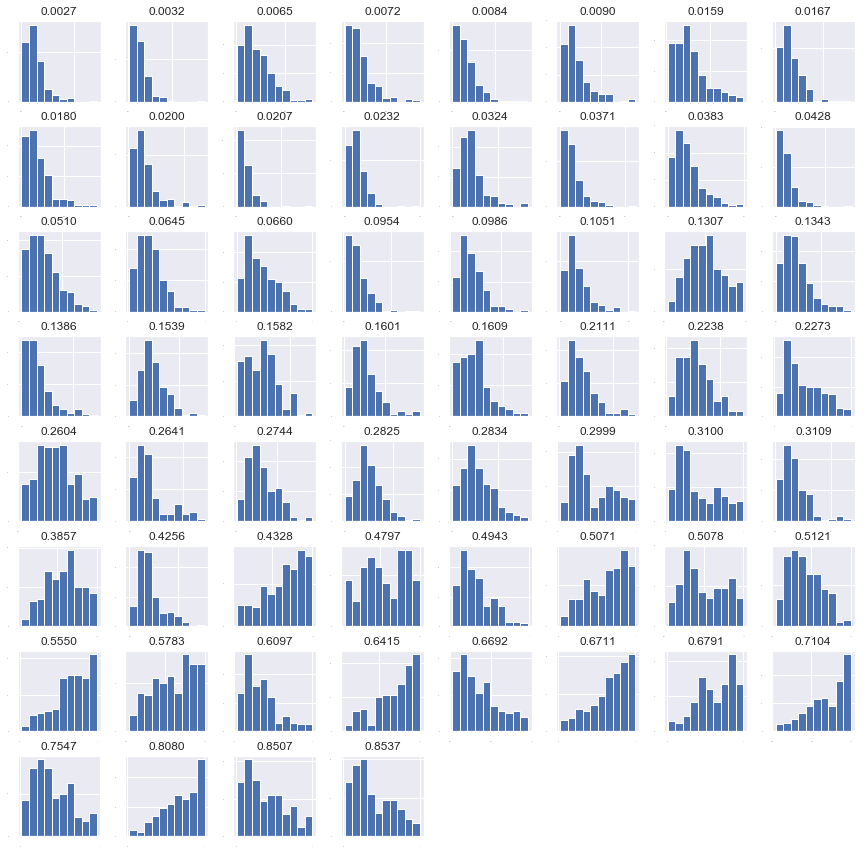

In [22]:
# data visualization

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,15)

df.hist(xlabelsize= 1 , ylabelsize= 1 , sharex=False ,sharey=False);

**Observations**

- We have a lot of Gaussian distributions and a few exponential distributions as well

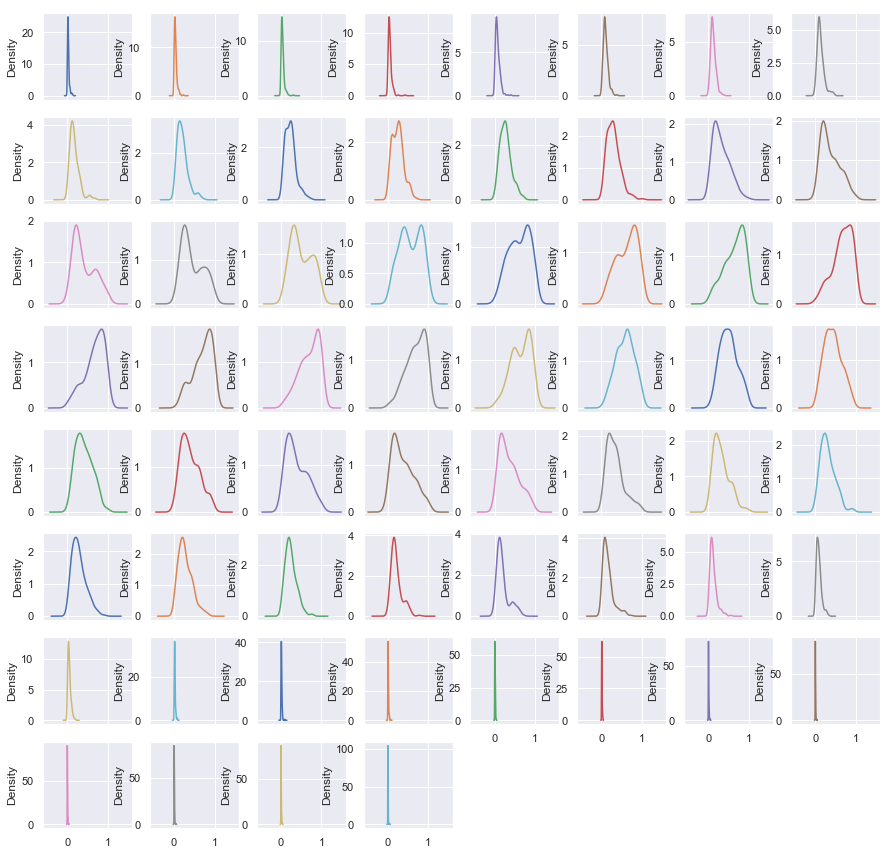

In [25]:
# density plots

df.plot(kind = 'density' , subplots= True , layout= (8,8) , legend= False);

**Observation**

- 1. We can see that a lot of the features have skewed distribution and thus **Box_Cox transformation** can be used to correct the Skewdness of the distributions

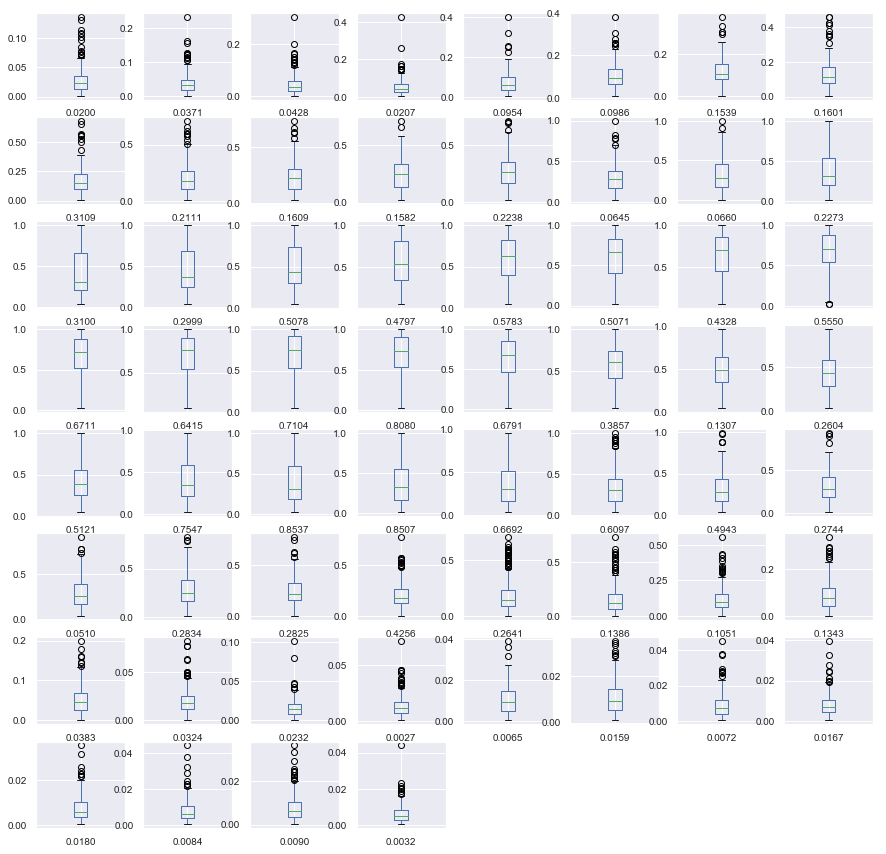

In [29]:
# box and whisker plots

df.plot(kind= 'box' , subplots= True , layout= (8,8) , legend= False , fontsize= 10);

**Observations**

- We can see that the attributes have varying spred and thus standadizing the data will get all the mean values lined up

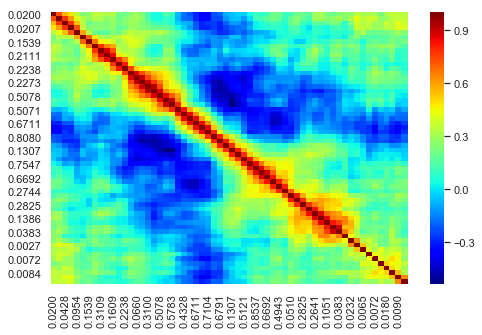

In [36]:
# Correlation matrix

corr =df.corr()
mpl.rcParams['figure.figsize'] = (8,5)
sns.heatmap(data = corr ,cmap = 'jet' , annot = False);

**Observations**

- The red around thediagonal suggests that the attributes next to each other are generally more corrrelated.
- The blue pathces suggest some moderate negative correlation the furthur attributes are far away from each other in ordering

In [5]:
# Splitting the dataset

X = df.iloc[: , :-1]
y = df.iloc[: , -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 7)

In [6]:
# Test options evaluation metric

num_folds = 10
seed = 7
scoring = 'accuracy'

### 2 . Evaluating different algorithm baselines

* 6 algoritms which work well with classification
   - **Linear Algorithms** - Logitic Regression and LDA
   - **Non-linear algorithms** - CART , SVC , KNN , Gaussian NB

In [7]:
# spot checking algorithms

models = []

models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('SVC' , SVC()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('NB' , GaussianNB()))

In [8]:
results = []
names = []

for name, model in models :
    kfold = KFold(n_splits= num_folds ,random_state= seed)
    cv_results = cross_val_score(model , X_train, y_train, cv = kfold , scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s : %f (%f)' % (name , cv_results.mean() , cv_results.std())
    print(msg)
    

LR : 0.757721 (0.065198)
LDA : 0.701838 (0.086338)
CART : 0.733456 (0.095705)
SVC : 0.547059 (0.106399)
KNN : 0.756618 (0.111644)
NB : 0.700368 (0.132161)


**Observation:**

   - Logistic Regression and KNN maybe worth further study

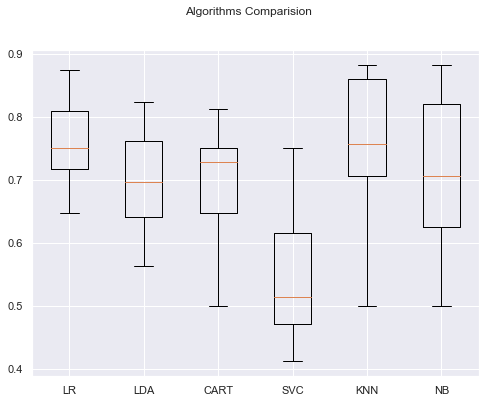

In [9]:
# # plotting the distributions of scores of all algorithms

fig = plt.figure(figsize=(10,7))
plt.suptitle('Algorithms Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

### 3. Data preparation

In [9]:
pipelines = []
pipelines.append(('ScaledLR' , Pipeline([('Scaler' , StandardScaler()) , ('LR' , LogisticRegression())])))
pipelines.append(('ScaledLDA' , Pipeline([('Scaler' ,StandardScaler()) , ('LDA' , LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledCART' , Pipeline([('Scaler' , StandardScaler()) , ('CART' , DecisionTreeClassifier())])))
pipelines.append(('ScaledSVC' , Pipeline([('Scaler' , StandardScaler()) , ('SVC' ,SVC())])))
pipelines.append(('ScaledKNN' , Pipeline([('Scaler' ,StandardScaler()) ,('KNN' , KNeighborsClassifier())])))
pipelines.append(("ScaledNB" , Pipeline([('Scaler' , StandardScaler()) , ('NB' ,GaussianNB())])))


In [10]:
results = []
names = []

for name,model in pipelines:
    kfold = KFold(n_splits= num_folds , random_state= seed)
    cv_results = cross_val_score(model , X_train , y_train, scoring= scoring , cv = kfold )
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name ,cv_results.mean() ,cv_results.std())
    print(msg)

ScaledLR: 0.739338 (0.085535)
ScaledLDA: 0.701838 (0.086338)
ScaledCART: 0.690809 (0.116393)
ScaledSVC: 0.824632 (0.067452)
ScaledKNN: 0.775368 (0.092709)
ScaledNB: 0.700368 (0.132161)


**Observation**

   - After scaling **SVM** has the highest accuracy followed by **KNN**

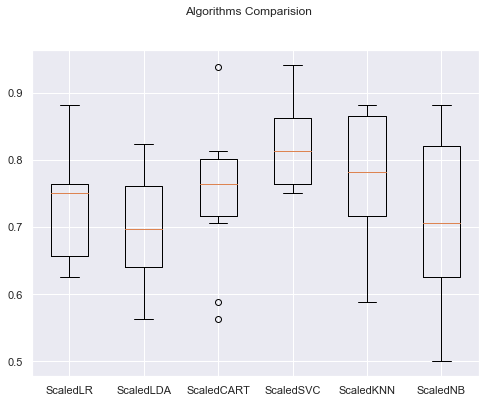

In [20]:
# # plotting the distributions of scores of all algorithms

fig = plt.figure(figsize=(10,7))
plt.suptitle('Algorithms Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

### 4. Algorithm Tuning

#### a) hyper tuning KNN with Gridsearch

In [11]:
# Tuning scaled KNN

scaler = StandardScaler().fit(X_train)
scaled_X = scaler.transform(X_train)

# neighbours = np.array([1,3,5,7,9,11,13,15,17,19,21]) Alternate way of declaring k values

neighbours = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors = neighbours)
model = KNeighborsClassifier()
kfold = KFold(n_splits= num_folds ,random_state= seed)
grid = GridSearchCV(estimator= model , param_grid= param_grid ,scoring= scoring ,cv = kfold)
grid_result = grid.fit(scaled_X , y_train)

In [12]:
print('Best : %f using %s' % (grid_result.best_score_ , grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean ,stdev, param in zip(means,stds , params):
    print('%f (%f) with %r' % (mean ,stdev , param))

Best : 0.830303 using {'n_neighbors': 1}
0.830303 (0.066015) with {'n_neighbors': 1}
0.818182 (0.065977) with {'n_neighbors': 3}
0.781818 (0.089757) with {'n_neighbors': 5}
0.751515 (0.055027) with {'n_neighbors': 7}
0.721212 (0.073553) with {'n_neighbors': 9}
0.696970 (0.048779) with {'n_neighbors': 11}
0.684848 (0.075451) with {'n_neighbors': 13}
0.684848 (0.068159) with {'n_neighbors': 15}
0.678788 (0.078620) with {'n_neighbors': 17}
0.672727 (0.068407) with {'n_neighbors': 19}
0.678788 (0.060708) with {'n_neighbors': 21}


#### b) Tuning SVM

- We can tune two key parameters of the SVM algo vix.
   - a) C-value : how much to relax the margin
   - b) kernel 

In [13]:
# tune scaled SVM

scaler = StandardScaler().fit(X_train)
scaled_X = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C= c_values , kernel= kernel_values)
model = SVC()
kfold = KFold(n_splits = num_folds , random_state= seed)
grid =GridSearchCV(estimator = model , param_grid = param_grid , scoring= scoring ,cv = kfold)
grid_result = grid.fit(scaled_X , y_train)

In [14]:
print('Best : %f using %s' % (grid_result.best_score_ , grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean ,stdev, param in zip(means,stds , params):
    print('%f (%f) with %r' % (mean ,stdev , param))

Best : 0.830303 using {'C': 1.5, 'kernel': 'rbf'}
0.757576 (0.045625) with {'C': 0.1, 'kernel': 'linear'}
0.539394 (0.189070) with {'C': 0.1, 'kernel': 'poly'}
0.533333 (0.097328) with {'C': 0.1, 'kernel': 'rbf'}
0.660606 (0.100061) with {'C': 0.1, 'kernel': 'sigmoid'}
0.739394 (0.087924) with {'C': 0.3, 'kernel': 'linear'}
0.636364 (0.155446) with {'C': 0.3, 'kernel': 'poly'}
0.751515 (0.071727) with {'C': 0.3, 'kernel': 'rbf'}
0.709091 (0.101886) with {'C': 0.3, 'kernel': 'sigmoid'}
0.703030 (0.103846) with {'C': 0.5, 'kernel': 'linear'}
0.672727 (0.164063) with {'C': 0.5, 'kernel': 'poly'}
0.787879 (0.062552) with {'C': 0.5, 'kernel': 'rbf'}
0.715152 (0.108311) with {'C': 0.5, 'kernel': 'sigmoid'}
0.721212 (0.099442) with {'C': 0.7, 'kernel': 'linear'}
0.709091 (0.140575) with {'C': 0.7, 'kernel': 'poly'}
0.793939 (0.059960) with {'C': 0.7, 'kernel': 'rbf'}
0.715152 (0.112845) with {'C': 0.7, 'kernel': 'sigmoid'}
0.709091 (0.095800) with {'C': 0.9, 'kernel': 'linear'}
0.703030 (0.15

**Observation**
   - We can see that the most accurate config was with **rbf = kernel** & **C = 1.5**

### 5 . Ensemble Models

We will be evaluating 4 different ensemble ML algorithms - 2 boosting and 2 bagging

   - **Boosting algorithms** - AdaBoost , GradientBoost
   - **Bagging Algorithm** - Random Forest  and Extra trees

**No standardization is required because apparantly all four ensembles we are using are based on decision trees and thus are less sensitive to data distributions**

In [15]:
# ensembles
ensembles = []
# Boosting methods
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

In [16]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.758088 (0.079819)
GBM: 0.770588 (0.111842)
RF: 0.714706 (0.111733)
ET: 0.788603 (0.091930)


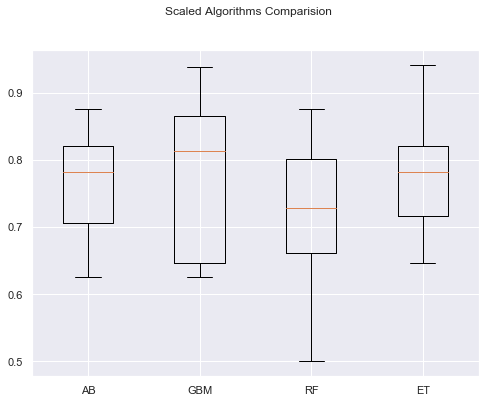

In [18]:
# plotting the distributions of scores of all algorithms

fig = plt.figure(figsize=(10,7))
plt.suptitle('Scaled Algorithms Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

**Conclusions -**

   - We have seen that the SVC has a higher score than the Enemble models

**Thus we are selecting the SVC as our best performing algorithm**

### 6. Finalizing the model(SVC)

In [20]:
# preparing the model

scaler = StandardScaler().fit(X_train)
scaled_X = scaler.transform(X_train)
model = SVC(C= 1.5)
model.fit(scaled_X , y_train)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [25]:
# Estimating accuracy on the test data

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
print('accuracy_score:', accuracy_score(y_test , y_pred))
print('-'*50)
print('Confusion matrix' )
print(confusion_matrix(y_test ,y_pred))
print('-'*50)
print('Classification report :')
print(classification_report(y_test,y_pred))

accuracy_score: 0.9285714285714286
--------------------------------------------------
Confusion matrix
[[24  2]
 [ 1 15]]
--------------------------------------------------
Classification report :
              precision    recall  f1-score   support

           M       0.96      0.92      0.94        26
           R       0.88      0.94      0.91        16

   micro avg       0.93      0.93      0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42

